In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


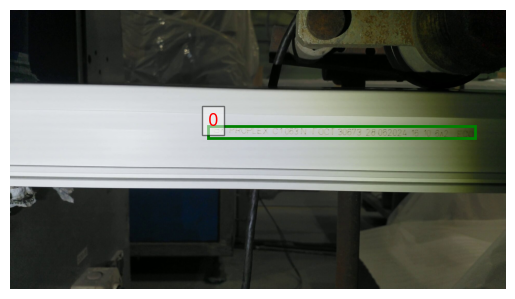

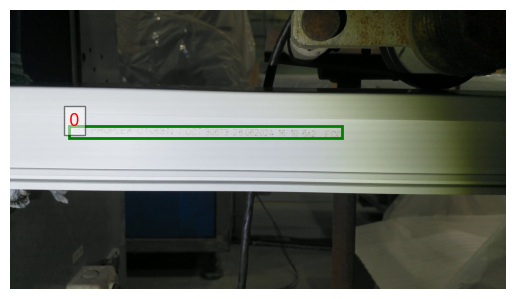

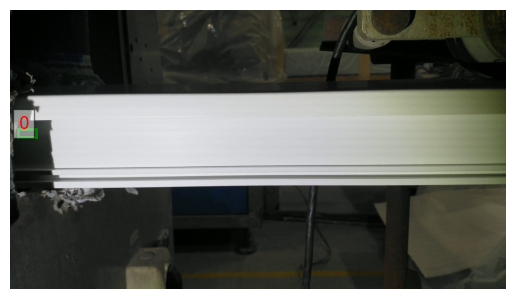

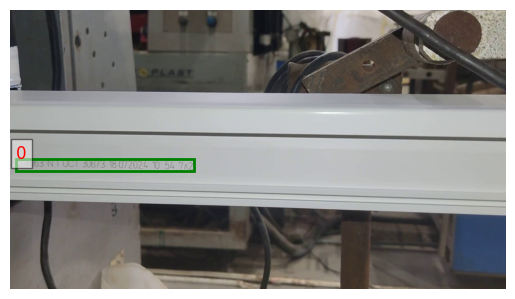

In [ ]:
# Путь к папкам с изображениями и разметкой
path = '/content/drive/MyDrive/Marking/Good_Mark'

images_path = os.path.join(path,'images')
labels_path = os.path.join(path,'labels')

# Получаем список всех изображений и разметки
images_list = [img for img in os.listdir(images_path) if img.endswith('.jpg') or img.endswith('.png')]
labels_list = [lbl for lbl in os.listdir(labels_path) if lbl.endswith('.txt')]

# Выбираем 10 случайных изображений
random_images = random.sample(images_list, len(images_list)%101)

# Функция для чтения и отрисовки разметки YOLO на изображении
def draw_boxes(image, labels_file):
    h, w, _ = image.shape

    # Создаем фигуру и оси для отображения изображения
    fig, ax = plt.subplots(1)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Конвертируем BGR в RGB для корректного отображения

    with open(labels_file, 'r') as f:
        #print(labels_file)
        for line in f.readlines():
            #print(line)
            class_id, x_center, y_center, width, height = map(float, line.strip().split())

            # Конвертируем нормализованные значения в пиксели
            x_center *= w
            y_center *= h
            width *= w
            height *= h

            # Вычисляем координаты углов прямоугольника
            x1 = x_center - width / 2
            y1 = y_center - height / 2

            # Добавляем прямоугольник на изображение
            rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(rect)

            # Добавляем текст с class_id
            plt.text(x1, y1, str(int(class_id)), color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.axis('off')  # Отключаем оси
    plt.show()       # Отображаем изображение

# Цикл по случайным изображениям
for image_file in random_images:
    # Читаем изображение
    image_path = os.path.join(images_path, image_file)
    image = cv2.imread(image_path)

    # Читаем соответствующий файл разметки
    label_file = os.path.join(labels_path, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    if os.path.exists(label_file):
        draw_boxes(image, label_file)
        #a = input('Press enter')